# 🧪 Etapa 1: Análise Exploratória de Dados (EDA)

# 1. Carregamento e Visão Geral dos Dados

In [77]:
import pandas as pd

df = pd.read_csv("../data/datasets/students_performance.csv")

# Primeiras e ultimas linhas do DataFrame
print("5 PRIMEIRAS LINHAS:")
display(df.head())
print("\n5 ÚLTIMAS LINHAS:")
display(df.tail())

# Linhas e colunas
print("\nDIMENSÕES DO DATAFRAME:")
linhas, colunas = df.shape
print(f"O dataframe possui {linhas} linhas e {colunas} colunas.") 

print("\nESTRUTURAS E TIPOS:")
df.info()

print("\nESTATÍSTICAS DAS VARIÁVEIS NUMÉRICAS:")
df.describe()


5 PRIMEIRAS LINHAS:


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade
0,STD01416,22,M,bachelor,5.66,69.55,Yes,6.49,49.41,No,Good,Medium,Good,85.39
1,STD01345,19,M,bachelor,13.30,58.82,Yes,8.12,50.29,No,NaN,Medium,Good,98.43
2,STD01705,25,M,master,10.43,59.72,Yes,6.60,71.64,No,Good,Medium,Good,100.00
3,STD00299,21,F,bachelor,3.90,68.33,Yes,6.99,50.93,Yes,Poor,Low,Excellent,86.85
4,STD01762,19,F,bachelor,4.24,50.44,Yes,8.06,54.00,No,Poor,Medium,Excellent,83.25



5 ÚLTIMAS LINHAS:


,student_id,age,gender,parental_education,study_hours_week,attendance_rate,extracurricular,sleep_hours,previous_scores,tutoring,internet_quality,family_income,health_status,final_grade
2505,STD00680,25,F,high_school,13.02,NaN,No,6.73,44.23,No,Good,High,Good,95.60
2506,STD01401,20,M,high_school,6.58,52.33,Yes,6.40,NaN,Yes,Good,High,Good,88.39
2507,STD02028,20,M,high_school,15.86,71.71,Yes,NaN,67.80,No,Good,Low,Good,96.71
2508,STD01147,23,M,bachelor,NaN,NaN,No,8.23,63.08,No,Good,Medium,Good,96.61
2509,STD00501,20,M,doctorate,14.77,53.52,Yes,6.90,49.52,Yes,NaN,Low,Excellent,100.00



DIMENSÕES DO DATAFRAME:
O dataframe possui 2510 linhas e 14 colunas.

ESTRUTURAS E TIPOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          2510 non-null   object 
 1   age                 2510 non-null   int64  
 2   gender              2510 non-null   object 
 3   parental_education  2510 non-null   object 
 4   study_hours_week    2217 non-null   float64
 5   attendance_rate     2278 non-null   float64
 6   extracurricular     2510 non-null   object 
 7   sleep_hours         2244 non-null   float64
 8   previous_scores     2383 non-null   float64
 9   tutoring            2510 non-null   object 
 10  internet_quality    2355 non-null   object 
 11  family_income       2232 non-null   object 
 12  health_status       2510 non-null   object 
 13  final_grade         2510 non-null   float64
dtypes: float64(5)

,age,study_hours_week,attendance_rate,sleep_hours,previous_scores,final_grade
count,2510.000000,2217.000000,2278.000000,2244.000000,2383.000000,2510.000000
mean,21.623904,10.603554,59.679789,6.996569,57.261028,92.090076
std,2.766664,8.635456,10.611523,1.336190,9.477943,7.446434
min,17.000000,-3.620000,20.820000,2.070000,21.200000,63.240000
25%,20.000000,6.510000,52.840000,6.130000,51.105000,86.982500
50%,22.000000,9.960000,59.905000,6.990000,57.300000,93.310000
75%,24.000000,13.400000,66.652500,7.830000,63.620000,99.850000
max,99.000000,113.200000,108.950000,15.950000,86.100000,101.070000


# 2. Análise de Qualidade dos Dados

# VALORES FALTANTES EM %:

In [78]:
print("\nVALORES FALTANTES POR COLUNA(%):")
df.isnull().sum()
(df.isnull().sum() / len(df)) * 100  # porcentagem


VALORES FALTANTES POR COLUNA(%):


student_id             0.000000
age                    0.000000
gender                 0.000000
parental_education     0.000000
study_hours_week      11.673307
attendance_rate        9.243028
extracurricular        0.000000
sleep_hours           10.597610
previous_scores        5.059761
tutoring               0.000000
internet_quality       6.175299
family_income         11.075697
health_status          0.000000
final_grade            0.000000
dtype: float64

# GRÁFICO DE VALORES FALTANTES E BOXPLOTS PARA ENCONTRAR OUTLIERS:

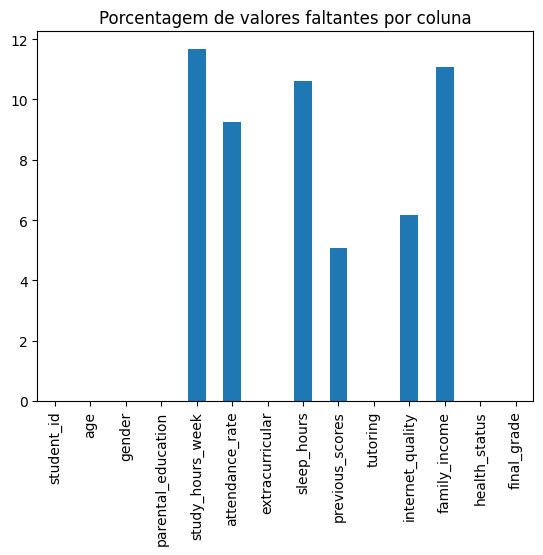

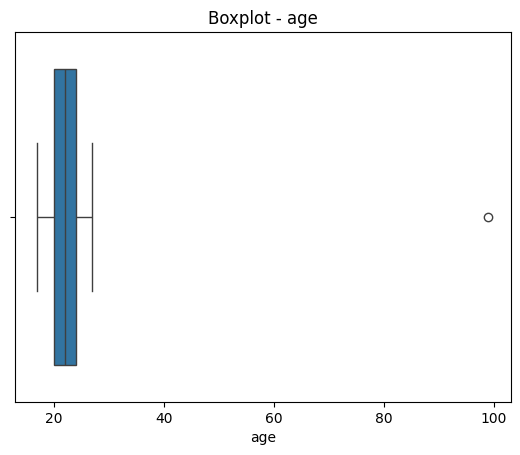

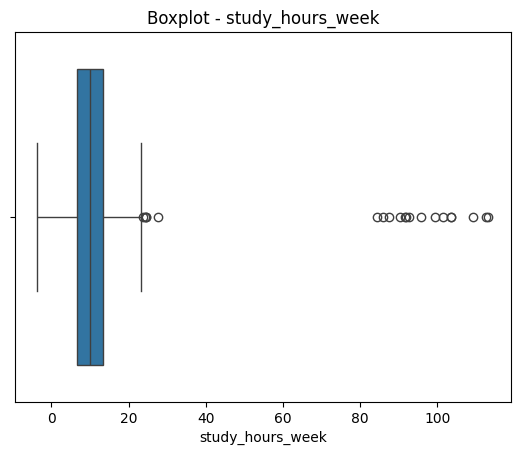

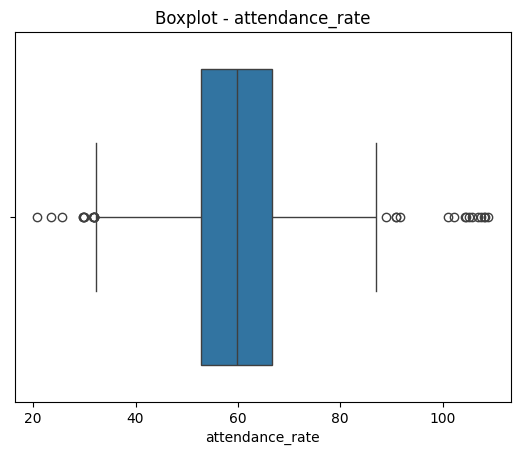

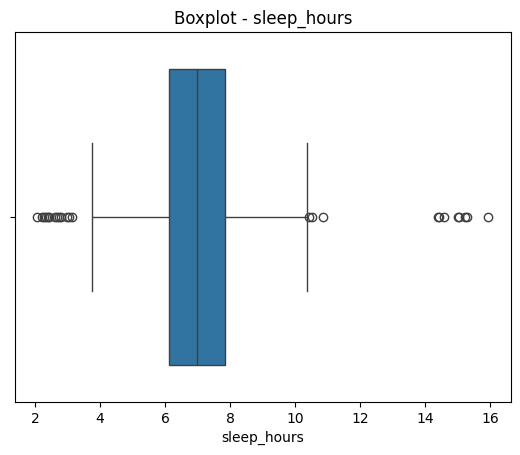

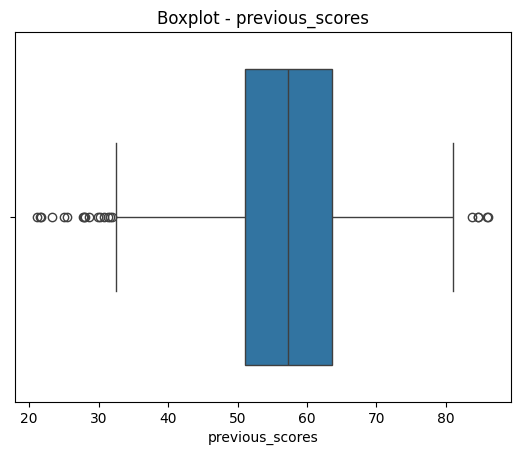

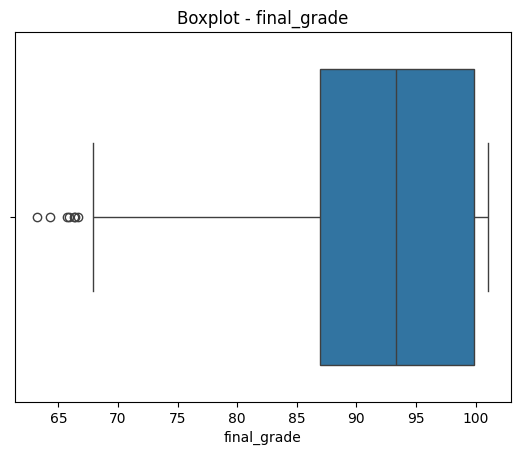

In [79]:
# Valores faltantes
import seaborn as sns
import matplotlib.pyplot as plt

missing_abs = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100


missing_pct.plot(kind='bar')
plt.title('Porcentagem de valores faltantes por coluna')
plt.show()


# Boxplots
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot - {col}')
    plt.show()


# 3. Análise Univariada

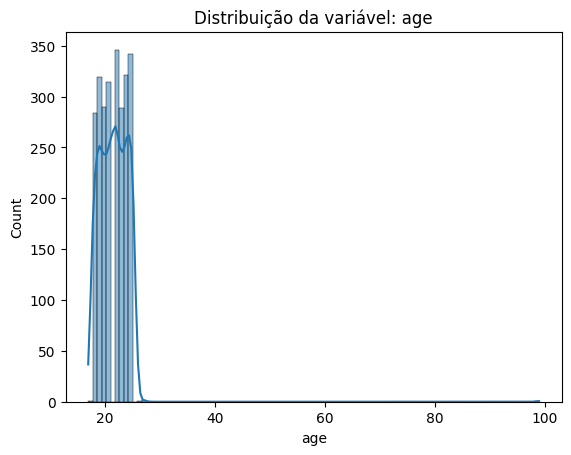

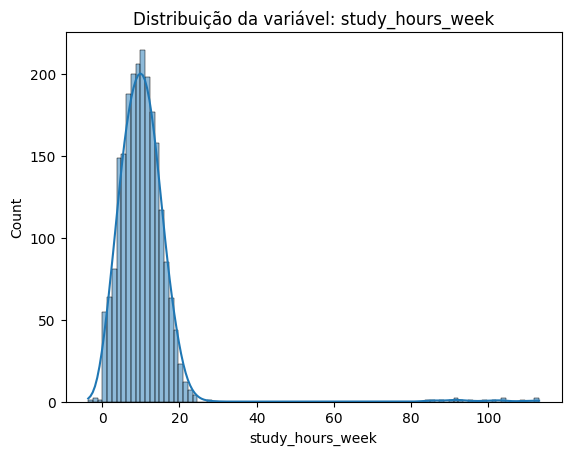

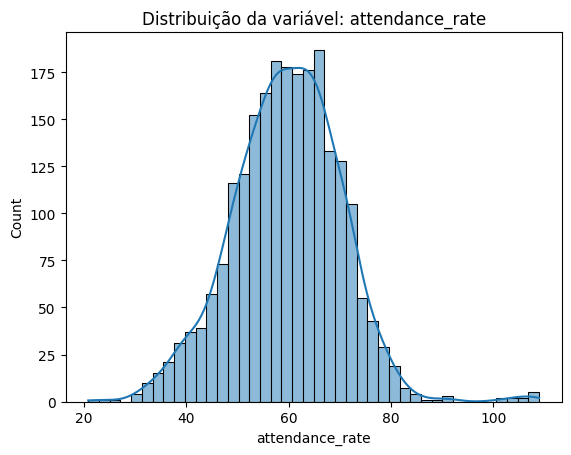

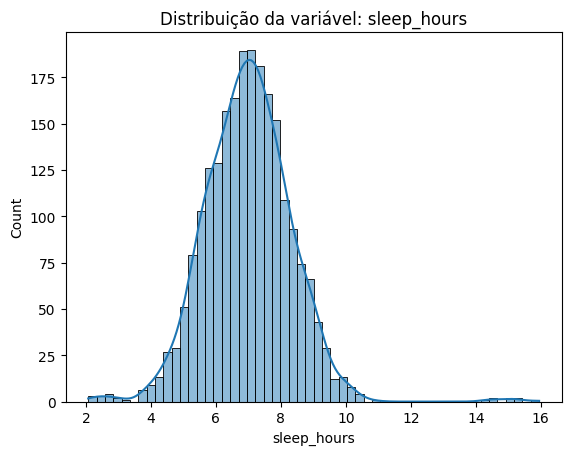

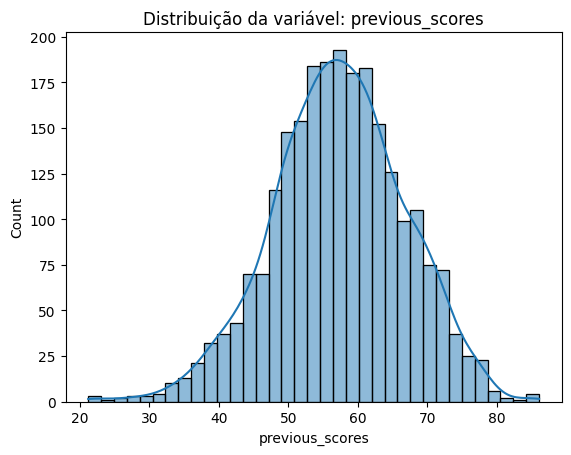

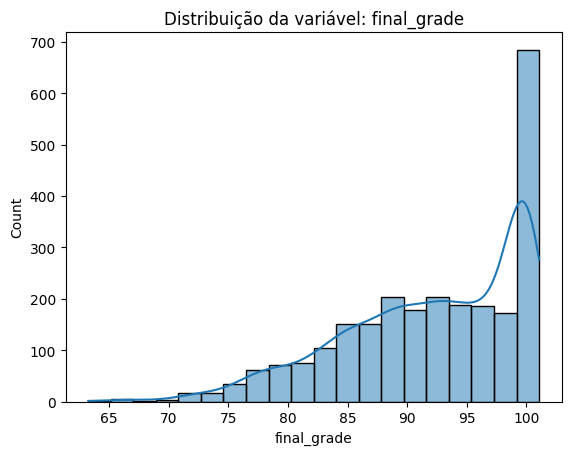

In [80]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição da variável: {col}')
    plt.show()